In [140]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd

In [141]:
data = pd.read_excel('glycine-standard-limit.xlsx')
data.head()

,m/z,Absolute Intensity,Relative Intensity
0,45,52277,6.99
1,46,1109,0.15
2,47,41757,5.58
3,48,590,0.08
4,49,1294,0.17


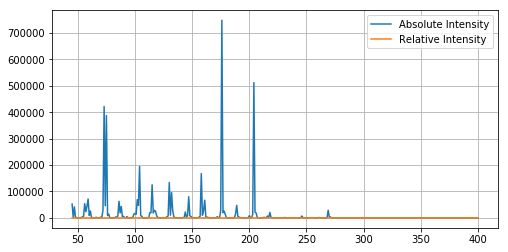

In [142]:
x = data["m/z"]
y = data["Absolute Intensity"]
z = data["Relative Intensity"]

plt.figure(figsize=(8,4))
plt.plot(x, y, label='Absolute Intensity')
plt.plot(x, z, label='Relative Intensity')
plt.grid()
plt.legend()
plt.show()

In [143]:
x = data["m/z"]
y = data["Absolute Intensity"]
z = data["Relative Intensity"]

x = np.asarray(x)
y = np.asarray(y)
z = np.asarray(z)

print(x)
print(y)
print(z)

[ 45  46  47  48  49  50  51  52  53  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  96  97  98  99 100 101
 102 103 104 105 106 107 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 138 139
 141 142 143 144 145 146 147 148 149 150 151 153 155 157 158 159 160 161
 162 163 165 166 167 168 169 170 171 172 173 174 175 176 177 178 180 182
 182 183 185 186 187 188 189 190 191 193 195 196 197 199 200 201 202 203
 204 205 206 207 210 211 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 229 230 231 232 233 235 236 237 238 240 241 243 244 245 246
 247 248 249 250 252 253 255 257 258 259 260 261 262 263 264 266 268 269
 270 271 272 273 274 278 281 283 284 286 287 288 289 291 291 292 293 295
 295 296 299 301 303 305 307 308 309 311 312 313 315 317 318 319 320 321
 323 324 325 328 329 330 332 334 335 337 340 340 34

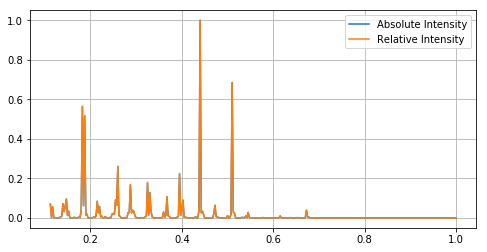

x:45, max_x:400, nx:0.1125
y:52277, max_y:748060, ny:0.0698834318102826
z:6.99, max_z:100.0, nz:0.0699


In [144]:
nx = x/max(x)
ny = y/max(y)
nz = z/max(z)

plt.figure(figsize=(8,4))
plt.plot(nx, ny, label='Absolute Intensity')
plt.plot(nx, nz, label='Relative Intensity')
plt.grid()
plt.legend()
plt.show()

print('x:{}, max_x:{}, nx:{}'.format(x[0], max(x), nx[0]))
print('y:{}, max_y:{}, ny:{}'.format(y[0], max(y),ny[0]))
print('z:{}, max_z:{}, nz:{}'.format(z[0], max(z),nz[0]))

In [145]:
colors = cm.hsv(z/max(z))
colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(z)

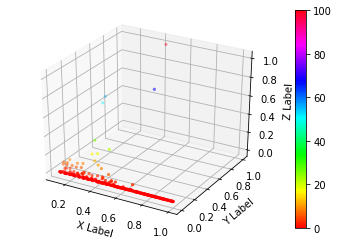

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nx, ny, nz, c=colors, marker='.')
cb = fig.colorbar(colmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

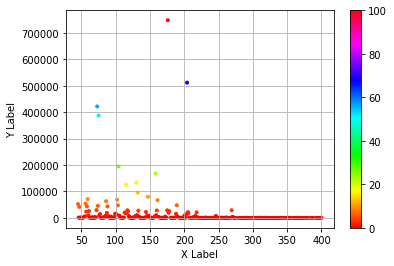

<Figure size 432x288 with 0 Axes>

In [147]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, c=colors, marker='.')
cb = fig.colorbar(colmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.grid()
plt.show()
plt.savefig("figure1.png")

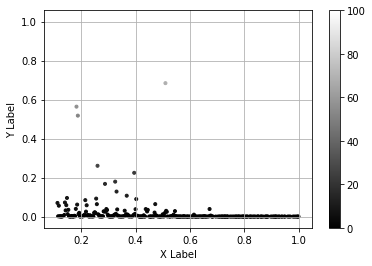

<Figure size 432x288 with 0 Axes>

In [148]:
g_colors = cm.gray(z/max(z))
g_colmap = cm.ScalarMappable(cmap=cm.gray)
g_colmap.set_array(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(nx, ny, c=g_colors, marker='.')
cb = fig.colorbar(g_colmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
plt.grid()
plt.show()
plt.savefig("figure1-1.png")

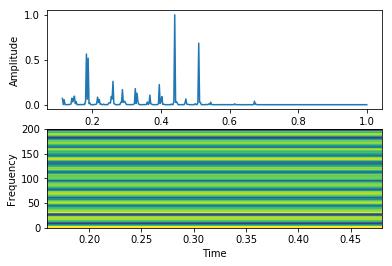

In [246]:
import matplotlib.pyplot as plot

import numpy as np

 

s1 = np.asarray(nx)
s2 = np.asarray(ny)
 

# Plot the signal

plot.subplot(211)

plot.plot(s1,s2)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

 

# Plot the spectrogram

plot.subplot(212)

powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(s2, Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()   

In [185]:
import math
from pylab import *
from numpy.fft import fft, fftshift

In [206]:
Fs = 2000.
Ts = 1./Fs

N = 279
freqstep = Fs/N

f = 10*freqstep
t = nx
y = ny

In [207]:
Y = fft(y)
Y = fftshift(Y)

In [208]:
figure(figsize = (8,4))
subplots_adjust(hspace=.4)
freq = freqstep * arange(-N/2, N/2)

<Figure size 576x288 with 0 Axes>

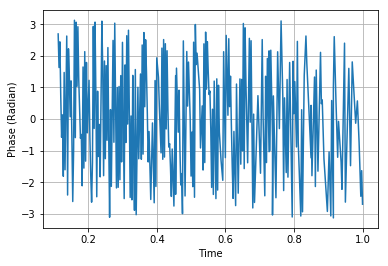

<Figure size 432x288 with 0 Axes>

In [210]:
plot(t, angle(Y), '-')
grid("on")
xlabel('Time')
ylabel('Phase (Radian)')

plt.show()
plt.savefig("Time-Phase1")

In [215]:
times = nx
n_measurements = len(times)
timespan_seconds = times[-1] - times[0]
sample_rate_hz = int(n_measurements / timespan_seconds)

In [216]:
data = ny
sf.write('recording.wav', data, 44100, 'PCM_24')

In [228]:
import os
import librosa
import librosa.display
import ffmpeg
import glob
import matplotlib.pyplot as plt
import numpy as np

In [229]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    
    return mfccs,chroma,mel,contrast,tonnetz

In [230]:
def parse_audio_files(filenames):
    rows = len(filenames)
    features, labels, groups = np.zeros((rows,193)), np.zeros((rows,3)), np.zeros((rows, 1))
    i = 0
    for fn in filenames:
        try:
            mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            y_col = int(fn.split('/')[3].split('-')[1])
            group = int(fn.split('/')[3].split('-')[0])
        except:
            print(fn)
        else:
            features[i] = ext_features
            labels[i, y_col] = 1
            groups[i] = group
            i += 1
    return features, labels, groups

In [235]:
audio_files = []
for i in range(1,11):
    audio_files.extend(glob.glob('/home/monn/4/h/fold%d/*.wav' % i))

In [236]:
print(len(audio_files))
for i in range(4):
    files = audio_files[i*4800: (i+1)*4800]
    X, y, groups = parse_audio_files(files)
    for r in y:
        if np.sum(r) > 1.5:
            print('error occured')
            break
    np.savez('urban_sound_%d' % i, X=X, y=y, groups=groups)

1
/home/monn/4/h/fold1/1234-0-0-1.wav


/home/monn/anaconda3/envs/356/lib/python3.5/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [237]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [238]:
frame_length = 1050
frame_stride = 10

Text(0.5,1,'Log-frequency power spectrogram')

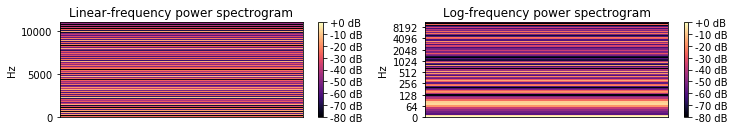

In [242]:
import matplotlib.pyplot as plt
y, sr = librosa.load('/home/monn/4/h/fold1/1234-0-0-1.wav')
plt.figure(figsize=(12, 8))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

plt.subplot(4, 2, 2)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

In [162]:
import matplotlib.pyplot as plt
import numpy as np

In [163]:
# Fixing random state for reproducibility
np.random.seed(19680801)

/home/monn/anaconda3/envs/356/lib/python3.5/site-packages/matplotlib/mlab.py:1274: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=279).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))


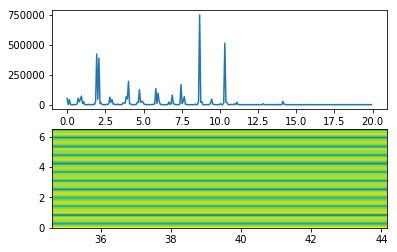

In [184]:
dt = 0.0717
t = np.arange(0.0, 20.0, dt)
s1 = np.asarray(x)
s2 = np.asarray(y)

# add some noise into the mix
nse = 0.01 * np.random.random(size=len(t))

x = s1 + s2 + nse  # the signal
NFFT = 1024  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(t, x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
plt.show()